# Classifying Magnetic Resonance Images of Older Adult Brains as Dementia Likely or Dementia Unlikely
By Jacqueline Chao

**Keywords:** _Bayes' theorem_, _Classification_, _conditional probability_, _Gaussian distribution_, _naive Bayes classifier_, _Normal distribution_

## 1. Project Description:
This project is an exercise of classification by Bayes' theorem (conditional probability). It utilizes an OASIS data set of Magnetic Resonance Imaging (MRI) scans of older adult brains. The object of this project is not so much to obtain an accurate classifier as it is to go through the process of modeling data as Normal distributions and constructing a naive Bayes classifier. This project was completed as part of an assignment for CS 3501: Foundations of Machine Learning.

## 2. Program:

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read csv file
df = pd.read_csv('OASIS_brain_data_set.csv')

df

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,399,OAS1_0453_MR1,F,R,70,1,4.0,29,0.5,1295,0.748,1.355,NaN,4037,3852,0,1
221,400,OAS1_0454_MR1,F,R,73,3,2.0,23,0.5,1536,0.730,1.142,NaN,3545,3337,0,1
222,401,OAS1_0455_MR1,F,R,61,2,4.0,28,0.0,1354,0.825,1.297,NaN,4427,4439,0,0
223,402,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,4616,3978,0,0


Text(0.5, 1.0, 'Left Hippocampus Volume vs. Right Hippocampus Volume')

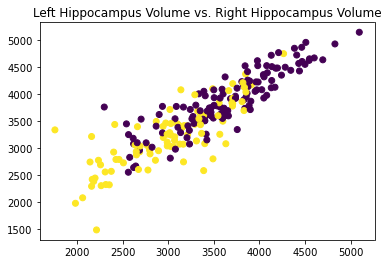

In [3]:
plt.scatter(df['LeftHippoVol'], df['RightHippoVol'], c=df['Dementia'])
plt.title('Left Hippocampus Volume vs. Right Hippocampus Volume')

In [4]:
# get train data set
train_df = df[df['TrainData']==1]

train_df

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
5,12,OAS1_0015_MR1,M,R,76,2,NaN,28,0.5,1738,0.719,1.010,NaN,3052,2770,1,1
16,27,OAS1_0031_MR1,M,R,88,1,4.0,26,1.0,1419,0.674,1.236,NaN,2425,2167,1,1
18,29,OAS1_0033_MR1,F,R,80,4,2.0,29,0.0,1323,0.735,1.326,NaN,3773,2937,1,0
19,30,OAS1_0034_MR1,M,R,51,5,1.0,29,0.0,1538,0.831,1.141,NaN,4721,4409,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,389,OAS1_0443_MR1,F,R,52,3,3.0,30,0.0,1431,0.814,1.226,NaN,4078,3971,1,0
214,391,OAS1_0445_MR1,F,R,90,1,2.0,29,0.0,1362,0.673,1.289,NaN,3538,2703,1,0
217,395,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,3154,3424,1,0
218,397,OAS1_0451_MR1,M,R,73,5,3.0,27,0.5,1687,0.728,1.040,NaN,3456,3029,1,1


LHV_min_val: 1758
LHV_max_val: 5095
LHV_mean: 3376.0625
LHV_std: 649.5575386819543


Text(0.5, 1.0, 'Probability Distribution of Left Hippocampus Volume (X1)')

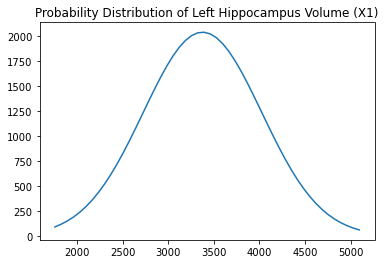

In [5]:
# model LHV probability distribution as Normal
def model_as_Normal(a_mean, a_std, an_x_val):
    prob_density = (np.pi*a_std) * np.exp(-0.5*((an_x_val-a_mean)/a_std)**2)
    return prob_density

LHV_vals = train_df['LeftHippoVol']

LHV_min_val = train_df['LeftHippoVol'].min()
print('LHV_min_val: ' + str(LHV_min_val))
LHV_max_val = train_df['LeftHippoVol'].max()
print('LHV_max_val: ' + str(LHV_max_val))

x1 = np.linspace(LHV_min_val, LHV_max_val)

LHV_mean = LHV_vals.mean()
print('LHV_mean: ' + str(LHV_mean))
LHV_std = LHV_vals.std()
print('LHV_std: ' + str(LHV_std))

LHV_pds = model_as_Normal(LHV_mean, LHV_std, x1)

plt.plot(x1, LHV_pds)
plt.title('Probability Distribution of Left Hippocampus Volume (X1)')

RHV_min_val: 1984
RHV_max_val: 5142
RHV_mean: 3592.714285714286
RHV_std: 652.6147605900634


Text(0.5, 1.0, 'Probability Distribution of Right Hippocampus Volume (X2)')

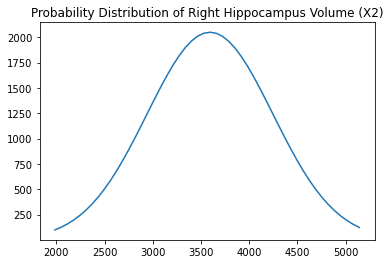

In [6]:
# model RHV probability distribution as Normal
RHV_vals = train_df['RightHippoVol']

RHV_min_val = train_df['RightHippoVol'].min()
print('RHV_min_val: ' + str(RHV_min_val))
RHV_max_val = train_df['RightHippoVol'].max()
print('RHV_max_val: ' + str(RHV_max_val))

x2 = np.linspace(RHV_min_val, RHV_max_val)

RHV_mean = RHV_vals.mean()
print('RHV_mean: ' + str(RHV_mean))
RHV_std = RHV_vals.std()
print('RHV_std: ' + str(RHV_std))

RHV_pds = model_as_Normal(RHV_mean, RHV_std, x2)

plt.plot(x2, RHV_pds)
plt.title('Probability Distribution of Right Hippocampus Volume (X2)')

In [7]:
# get No Dementia (NoD) data set from train data set
train_NoD_df = train_df[train_df['Dementia']==0]

train_NoD_df

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
18,29,OAS1_0033_MR1,F,R,80,4,2.0,29,0.0,1323,0.735,1.326,NaN,3773,2937,1,0
19,30,OAS1_0034_MR1,M,R,51,5,1.0,29,0.0,1538,0.831,1.141,NaN,4721,4409,1,0
24,39,OAS1_0044_MR1,F,R,47,4,2.0,30,0.0,1346,0.829,1.304,NaN,4602,4468,1,0
28,51,OAS1_0058_MR1,F,R,46,5,1.0,30,0.0,1585,0.817,1.107,NaN,4846,4384,1,0
30,55,OAS1_0062_MR1,F,R,73,3,2.0,30,0.0,1456,0.754,1.205,NaN,3519,3332,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,380,OAS1_0433_MR1,M,R,58,4,1.0,27,0.0,1606,0.779,1.093,NaN,4549,4500,1,0
213,389,OAS1_0443_MR1,F,R,52,3,3.0,30,0.0,1431,0.814,1.226,NaN,4078,3971,1,0
214,391,OAS1_0445_MR1,F,R,90,1,2.0,29,0.0,1362,0.673,1.289,NaN,3538,2703,1,0
217,395,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,3154,3424,1,0


In [8]:
# get Dementia (D) data set from train data set
train_D_df = train_df[train_df['Dementia']==1]

train_D_df

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
5,12,OAS1_0015_MR1,M,R,76,2,NaN,28,0.5,1738,0.719,1.010,NaN,3052,2770,1,1
16,27,OAS1_0031_MR1,M,R,88,1,4.0,26,1.0,1419,0.674,1.236,NaN,2425,2167,1,1
20,31,OAS1_0035_MR1,F,R,84,3,2.0,28,1.0,1402,0.695,1.252,NaN,3035,3025,1,1
21,34,OAS1_0039_MR1,M,R,70,4,3.0,29,0.5,1463,0.772,1.200,NaN,3380,3152,1,1
22,36,OAS1_0041_MR1,F,R,62,2,NaN,28,0.5,1350,0.758,1.300,NaN,3339,1758,1,1
27,49,OAS1_0056_MR1,F,R,72,3,3.0,15,1.0,1324,0.668,1.325,NaN,2746,2143,1,1
33,59,OAS1_0066_MR1,F,R,66,1,4.0,28,0.5,1309,0.765,1.341,NaN,3114,2989,1,1
34,60,OAS1_0067_MR1,F,R,71,4,1.0,27,1.0,1549,0.730,1.133,NaN,3637,3454,1,1
40,66,OAS1_0073_MR1,F,R,69,2,4.0,21,1.0,1495,0.655,1.174,NaN,3025,3057,1,1


LHV_NoD_min_val: 2565
LHV_NoD_max_val: 5095
LHV_NoD_mean: 3666.0454545454545
LHV_NoD_std: 555.5992034058138


Text(0.5, 1.0, 'Probability Distribution of Left Hippocampus Volume of No Dementia Patients')

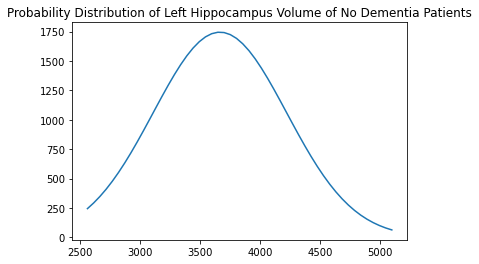

In [9]:
# model LHV-NoD probability distribution as Normal distribution
LHV_NoD_vals = train_NoD_df['LeftHippoVol']

LHV_NoD_min_val = train_NoD_df['LeftHippoVol'].min()
print('LHV_NoD_min_val: ' + str(LHV_NoD_min_val))
LHV_NoD_max_val = train_NoD_df['LeftHippoVol'].max()
print('LHV_NoD_max_val: ' + str(LHV_NoD_max_val))

x1_NoD = np.linspace(LHV_NoD_min_val, LHV_NoD_max_val)

LHV_NoD_mean = LHV_NoD_vals.mean()
print('LHV_NoD_mean: ' + str(LHV_NoD_mean))
LHV_NoD_std = LHV_NoD_vals.std()
print('LHV_NoD_std: ' + str(LHV_NoD_std))

LHV_NoD_pds = model_as_Normal(LHV_NoD_mean, LHV_NoD_std, x1_NoD)

plt.plot(x1_NoD, LHV_NoD_pds)
plt.title('Probability Distribution of Left Hippocampus Volume of No Dementia Patients')

LHV_D_min_val: 1758
LHV_D_max_val: 4265
LHV_D_mean: 2960.0
LHV_D_std: 542.7477007474713


Text(0.5, 1.0, 'Probability Distribution of Left Hippocampus Volume of Dementia Patients')

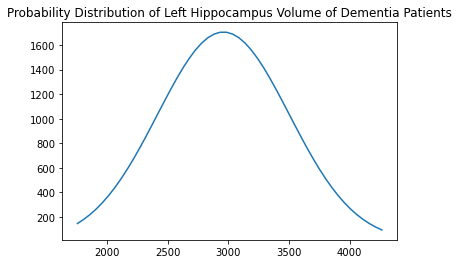

In [10]:
# model LHV-D probability distribution as Normal distribution
LHV_D_vals = train_D_df['LeftHippoVol']

LHV_D_min_val = train_D_df['LeftHippoVol'].min()
print('LHV_D_min_val: ' + str(LHV_D_min_val))
LHV_D_max_val = train_D_df['LeftHippoVol'].max()
print('LHV_D_max_val: ' + str(LHV_D_max_val))

x1_D = np.linspace(LHV_D_min_val, LHV_D_max_val)

LHV_D_mean = LHV_D_vals.mean()
print('LHV_D_mean: ' + str(LHV_D_mean))
LHV_D_std = LHV_D_vals.std()
print('LHV_D_std: ' + str(LHV_D_std))

LHV_D_pds = model_as_Normal(LHV_D_mean, LHV_D_std, x1_D)

plt.plot(x1_D, LHV_D_pds)
plt.title('Probability Distribution of Left Hippocampus Volume of Dementia Patients')

RHV_NoD_min_val: 2817
RHV_NoD_max_val: 5142
RHV_NoD_mean: 3882.681818181818
RHV_NoD_std: 549.2280221180638


Text(0.5, 1.0, 'Probability Distribution of Right Hippocampus Volume of No Dementia Patients')

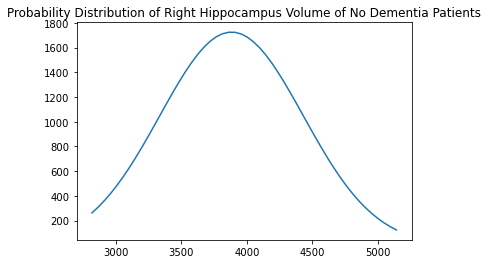

In [11]:
# model RHV-NoD probability distribution as Normal distribution
RHV_NoD_vals = train_NoD_df['RightHippoVol']

RHV_NoD_min_val = train_NoD_df['RightHippoVol'].min()
print('RHV_NoD_min_val: ' + str(RHV_NoD_min_val))
RHV_NoD_max_val = train_NoD_df['RightHippoVol'].max()
print('RHV_NoD_max_val: ' + str(RHV_NoD_max_val))

x2_NoD = np.linspace(RHV_NoD_min_val, RHV_NoD_max_val)

RHV_NoD_mean = RHV_NoD_vals.mean()
print('RHV_NoD_mean: ' + str(RHV_NoD_mean))
RHV_NoD_std = RHV_NoD_vals.std()
print('RHV_NoD_std: ' + str(RHV_NoD_std))

RHV_NoD_pds = model_as_Normal(RHV_NoD_mean, RHV_NoD_std, x2_NoD)

plt.plot(x2_NoD, RHV_NoD_pds)
plt.title('Probability Distribution of Right Hippocampus Volume of No Dementia Patients')

RHV_D_min_val: 1984
RHV_D_max_val: 4747
RHV_D_mean: 3176.6739130434785
RHV_D_std: 560.8871565791633


Text(0.5, 1.0, 'Probability Distribution of Right Hippocampus Volume of Dementia Patients')

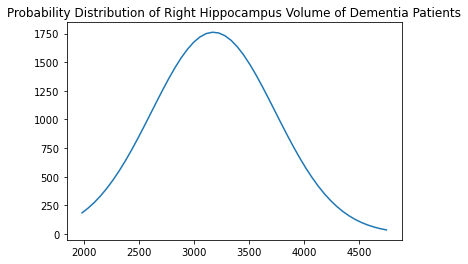

In [12]:
# model RHV-D probability distribution as Normal distribution
RHV_D_vals = train_D_df['RightHippoVol']

RHV_D_min_val = train_D_df['RightHippoVol'].min()
print('RHV_D_min_val: ' + str(RHV_D_min_val))
RHV_D_max_val = train_D_df['RightHippoVol'].max()
print('RHV_D_max_val: ' + str(RHV_D_max_val))

x2_D = np.linspace(RHV_D_min_val, RHV_D_max_val)

RHV_D_mean = RHV_D_vals.mean()
print('RHV_D_mean: ' + str(RHV_D_mean))
RHV_D_std = RHV_D_vals.std()
print('RHV_D_std: ' + str(RHV_D_std))

RHV_D_pds = model_as_Normal(RHV_D_mean, RHV_D_std, x2_D)

plt.plot(x2_D, RHV_D_pds)
plt.title('Probability Distribution of Right Hippocampus Volume of Dementia Patients')

In [13]:
# get test data set
test_df = df[df['TrainData']==0]

test_df

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0
6,13,OAS1_0016_MR1,M,R,82,2,4.0,27,0.5,1477,0.739,1.188,NaN,3421,3119,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,398,OAS1_0452_MR1,M,R,75,1,4.0,22,1.0,1656,0.762,1.060,NaN,3838,3699,0,1
220,399,OAS1_0453_MR1,F,R,70,1,4.0,29,0.5,1295,0.748,1.355,NaN,4037,3852,0,1
221,400,OAS1_0454_MR1,F,R,73,3,2.0,23,0.5,1536,0.730,1.142,NaN,3545,3337,0,1
222,401,OAS1_0455_MR1,F,R,61,2,4.0,28,0.0,1354,0.825,1.297,NaN,4427,4439,0,0


In [14]:
# classify test individuals
def classify(an_x1, an_x2):
    NoD_likelihood = model_as_Normal(LHV_NoD_mean, LHV_NoD_std, an_x1) * model_as_Normal(RHV_NoD_mean, RHV_NoD_std, an_x2)
    D_likelihood = model_as_Normal(LHV_D_mean, LHV_D_std, an_x1) * model_as_Normal(RHV_D_mean, RHV_D_std, an_x2)
    
    evidence = model_as_Normal(LHV_mean, LHV_std, an_x1) * model_as_Normal(RHV_mean, RHV_std, an_x2)
    NoD_prob = (NoD_likelihood * 0.5)/evidence
    D_prob = (D_likelihood * 0.5)/evidence
    
    if NoD_prob > D_prob:
        return 0 # dementia unlikely
    else:
        return 1 # dementia likely

test_df['Classification'] = test_df.apply(lambda row: classify(row['LeftHippoVol'], row['RightHippoVol']), axis=1)

test_df

<ipython-input-14-c1c86eced067>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Classification'] = test_df.apply(lambda row: classify(row['LeftHippoVol'], row['RightHippoVol']), axis=1)


,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia,Classification
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0,0
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0,1
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0,0
6,13,OAS1_0016_MR1,M,R,82,2,4.0,27,0.5,1477,0.739,1.188,NaN,3421,3119,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,398,OAS1_0452_MR1,M,R,75,1,4.0,22,1.0,1656,0.762,1.060,NaN,3838,3699,0,1,0
220,399,OAS1_0453_MR1,F,R,70,1,4.0,29,0.5,1295,0.748,1.355,NaN,4037,3852,0,1,0
221,400,OAS1_0454_MR1,F,R,73,3,2.0,23,0.5,1536,0.730,1.142,NaN,3545,3337,0,1,0
222,401,OAS1_0455_MR1,F,R,61,2,4.0,28,0.0,1354,0.825,1.297,NaN,4427,4439,0,0,0


In [15]:
test_df['Match'] = test_df.apply(lambda row: row['Dementia']==row['Classification'], axis=1)

test_df

<ipython-input-15-3b93fa4d8934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Match'] = test_df.apply(lambda row: row['Dementia']==row['Classification'], axis=1)


,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia,Classification,Match
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0,0,True
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0,1,False
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0,0,True
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0,0,True
6,13,OAS1_0016_MR1,M,R,82,2,4.0,27,0.5,1477,0.739,1.188,NaN,3421,3119,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,398,OAS1_0452_MR1,M,R,75,1,4.0,22,1.0,1656,0.762,1.060,NaN,3838,3699,0,1,0,False
220,399,OAS1_0453_MR1,F,R,70,1,4.0,29,0.5,1295,0.748,1.355,NaN,4037,3852,0,1,0,False
221,400,OAS1_0454_MR1,F,R,73,3,2.0,23,0.5,1536,0.730,1.142,NaN,3545,3337,0,1,0,False
222,401,OAS1_0455_MR1,F,R,61,2,4.0,28,0.0,1354,0.825,1.297,NaN,4427,4439,0,0,0,True


In [16]:
value_counts = test_df['Match'].value_counts()
value_counts

True     82
False    31
Name: Match, dtype: int64

In [18]:
classifier_accuracy = value_counts.get(True) / (value_counts.get(True) + value_counts.get(False))
classifier_accuracy

0.7256637168141593